import pandas as pd
from database_helper import Database 

In [1]:
from database_helper import Database
import pandas as pd

from venn import venn
%matplotlib inline
db = Database('/Users/alessiogandelli/data_social_dynamics/social_dynamics.sqlite')


# Missing userid exploration 

## get all userid from each dataset 

In [80]:

td_userid = db.query("select distinct userid from diary")
socio_userid = db.query("select distinct userid from socio")
loc_userid = db.query("select distinct userid from location")
not_userid = db.query("select distinct userid from notification")
app_userid = db.query("select distinct userid from application")
touch_userid = db.query("select distinct userid from touch")
screen_userid = db.query("select distinct userid from screen")

td_userid = set([i[0] for i in td_userid])
socio_userid = set([i[0] for i in socio_userid])
loc_userid = set([i[0] for i in loc_userid])
not_userid = set([i[0] for i in not_userid])
app_userid = set([i[0] for i in app_userid])
touch_userid = set([i[0] for i in touch_userid])


In [90]:
screen_userid = db.query("select distinct userid from screen")
screen_userid = set([i[0] for i in screen_userid])

## Some set operations 

In [95]:
all_userid = td_userid | socio_userid | loc_userid | not_userid | app_userid | touch_userid | screen_userid

td_missing = all_userid - td_userid
socio_missing = all_userid - socio_userid
loc_missing = all_userid - loc_userid
not_missing = all_userid - not_userid
app_missing = all_userid - app_userid
touch_missing = all_userid - touch_userid
screen_missing = all_userid - screen_userid

missing_all_sensors = loc_missing & not_missing & app_missing & touch_missing & screen_missing

some_sensors_userid = all_userid - missing_all_sensors # remove missing all sensors 


useful_td_missing = some_sensors_userid - td_userid
useful_socio_missing = some_sensors_userid - socio_userid

useful_userid = some_sensors_userid - useful_td_missing - useful_socio_missing # remove missing from td and socio

useful_loc_missing = useful_userid - loc_userid
useful_not_missing = useful_userid - not_userid
useful_app_missing = useful_userid - app_userid
useful_touch_missing = useful_userid - touch_userid
useful_screen_missing = useful_userid - screen_userid



In [98]:
print('there are '+str(len(all_userid))+ ' users')
print( 'there are '+ str(len(td_userid & socio_userid & loc_userid & not_userid & app_userid & touch_userid)) + ' users with all data')

print('\nthere are '+str(len(td_userid))+ ' users with diary data')
print('there are '+str(len(socio_userid))+ ' users with socio data')
print('there are '+str(len(loc_userid))+ ' users with location data')
print('there are '+str(len(not_userid))+ ' users with notification data')
print('there are '+str(len(app_userid))+ ' users with application data')
print('there are '+str(len(touch_userid))+ ' users with touch data')
print('there are '+str(len(screen_userid))+ ' users with screen data')


print('\nthere are '+str(len(td_missing))+ ' users with missing time diary')
print('there are '+str(len(socio_missing))+ ' users with missing socio')
print('there are '+str(len(loc_missing))+ ' users with missing location')
print('there are '+str(len(not_missing))+ ' users with missing notification')
print('there are '+str(len(app_missing))+ ' users with missing application')
print('there are '+str(len(touch_missing))+ ' users with missing touch')
print('there are '+str(len(screen_missing))+ ' users with missing screen')

print( '\nthere are '+str(len(missing_all_sensors)+len(useful_td_missing) + len(useful_socio_missing))+ ' users with missing all sensors data or time diary or socio')


print('from the remaining '+str(len(useful_userid))+' users, '+str(len(useful_loc_missing))+' have missing location data')
print('from the remaining '+str(len(useful_userid))+' users, '+str(len(useful_not_missing))+' have missing notification data')
print('from the remaining '+str(len(useful_userid))+' users, '+str(len(useful_app_missing))+' have missing application data')
print('from the remaining '+str(len(useful_userid))+' users, '+str(len(useful_touch_missing))+' have missing touch data')
print('from the remaining '+str(len(useful_userid))+' users, '+str(len(useful_screen_missing))+' have missing screen data')




there are 252 users
there are 169 users with all data

there are 241 users with diary data
there are 249 users with socio data
there are 221 users with location data
there are 183 users with notification data
there are 234 users with application data
there are 201 users with touch data
there are 234 users with screen data

there are 11 users with missing time diary
there are 3 users with missing socio
there are 31 users with missing location
there are 69 users with missing notification
there are 18 users with missing application
there are 51 users with missing touch
there are 18 users with missing screen

there are 21 users with missing all sensors data or time diary or socio
from the remaining 231 users, 13 have missing location data
from the remaining 231 users, 49 have missing notification data
from the remaining 231 users, 0 have missing application data
from the remaining 231 users, 33 have missing touch data
from the remaining 231 users, 0 have missing screen data


## visualize missing users  

touch and application are the same 
if someone does not share touch then does not share anything 

62 users have missing data from at least one sensor
23 miss both notification and touch


<AxesSubplot: >

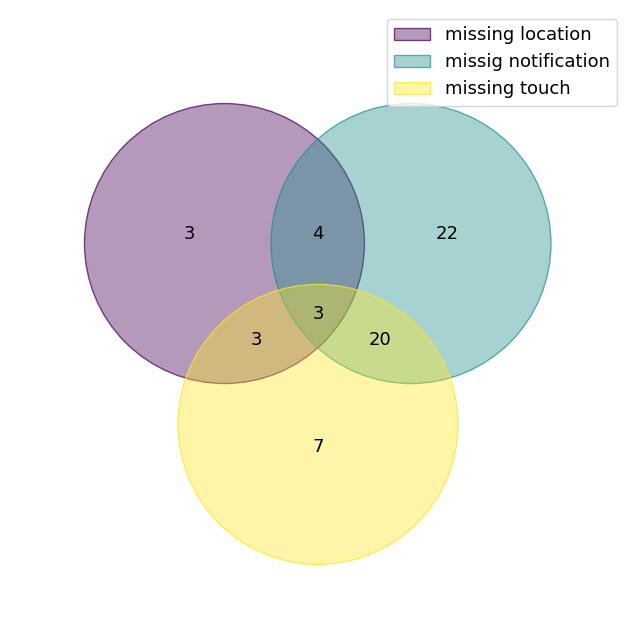

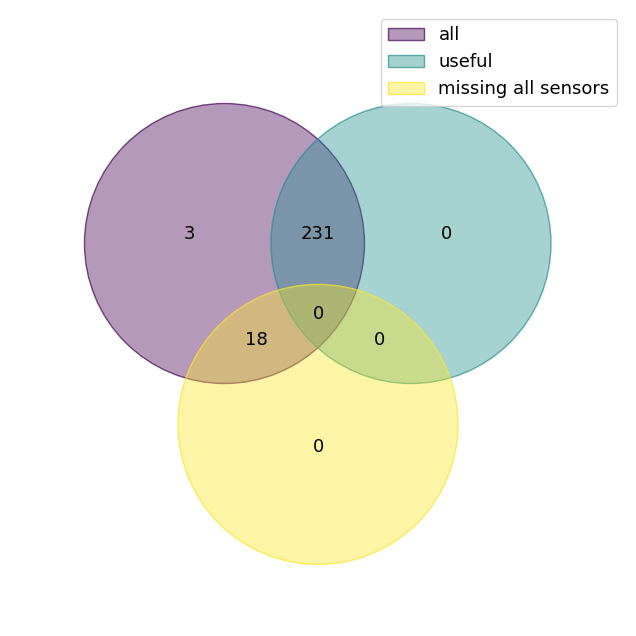

In [113]:
print(len(useful_loc_missing | useful_not_missing | useful_touch_missing), 'users have missing data from at least one sensor')
print(len(useful_not_missing  & useful_touch_missing), 'miss both notification and touch')
venn({'missing location': useful_loc_missing, 'missig notification': useful_not_missing, 'missing touch' : useful_touch_missing})
venn({'all': all_userid, 'useful' : useful_userid, 'missing all sensors' : missing_all_sensors})

# in depth table analysis 
once i have defined the useful users i can now explore which data is missing in the time diaries and socio tables  

## socio

## time diary

In [137]:
df = pd.read_sql_query("select * from diary", db.connection)
df = df.loc[df['userid'].isin(useful_userid)]

the data seems complete, there are 1114 records for each users 

In [147]:
#max rows to show
pd.set_option('display.max_rows', 500)

df.groupby('userid').count().sort_values('userid')

,timestamp,first2w,week,what,travel,travel_medium,sport,where,withwho,mood,date,time
userid,,,,,,,,,,,,
0,1114,1114,1114,1114,15,15,2,1114,1114,1114,1114,1114
1,1114,1114,1114,1114,6,6,4,1114,1114,1114,1114,1114
2,1114,1114,1114,1114,12,12,3,1114,1114,1114,1114,1114
3,1114,1114,1114,1114,16,16,0,1114,1114,1114,1114,1114
4,1114,1114,1114,1114,4,4,25,1114,1114,1114,1114,1114
5,1114,1114,1114,1114,7,7,7,1114,1114,1114,1114,1114
6,1114,1114,1114,1114,0,0,7,1114,1114,1114,1114,1114
7,1114,1114,1114,1114,0,0,0,1114,1114,1114,1114,1114
8,1114,1114,1114,1114,0,0,0,1114,1114,1114,1114,1114


In [164]:
df.groupby('date')['userid'].count()

date
2020-11-13    11184
2020-11-14    11184
2020-11-15    11184
2020-11-16    11184
2020-11-17    11184
2020-11-18    11184
2020-11-19    11184
2020-11-20    11184
2020-11-21    11184
2020-11-22    11184
2020-11-23    11184
2020-11-24    11184
2020-11-25    11184
2020-11-26    11184
2020-11-27    11184
2020-11-28    11184
2020-11-29    11184
2020-11-30     7922
2020-12-01     5592
2020-12-02     5592
2020-12-03     5592
2020-12-04     5592
2020-12-05     5592
2020-12-06     5592
2020-12-07     5592
2020-12-08     5592
2020-12-09     5592
2020-12-10     5592
2020-12-11     5592
Name: userid, dtype: int64

<AxesSubplot: xlabel='time'>

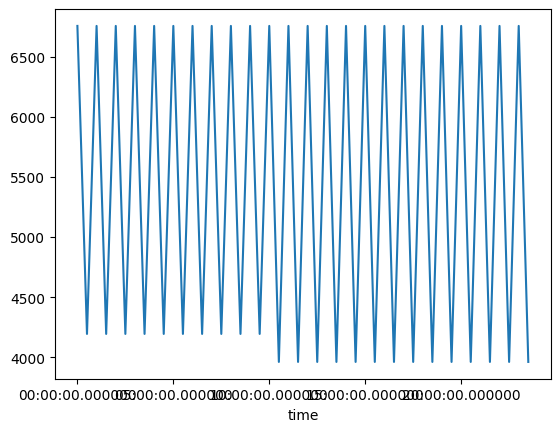

In [173]:
#max rows to show
pd.set_option('display.max_rows', 500)
df.groupby(['time'])['userid'].count().plot()

## touch 

In [5]:
df = pd.read_sql_query("select * from touch where userid = 234", db.connection)

In [24]:
import datetime

df['timestamp'] = pd.to_datetime(df['timestamp'])


<AxesSubplot: xlabel='timestamp'>

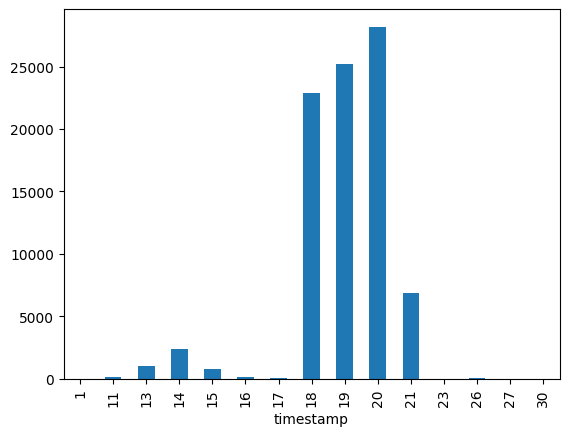

In [34]:
#group the dataframe by hour
# bar plot pandas 

df.groupby(df['timestamp'].dt.day)['userid'].count().plot(kind='bar')



In [ ]:
df.groupby(df['timestamp'].dt.hour)['userid'].count().plot(kind='bar')
df.groupby(df['timestamp'].dt.minute)['userid'].count().plot(kind='bar')

In [37]:
df = pd.read_sql_query("select count(userid) from touch group by strftime( '%H', timestamp) " , db.connection)

<AxesSubplot: >

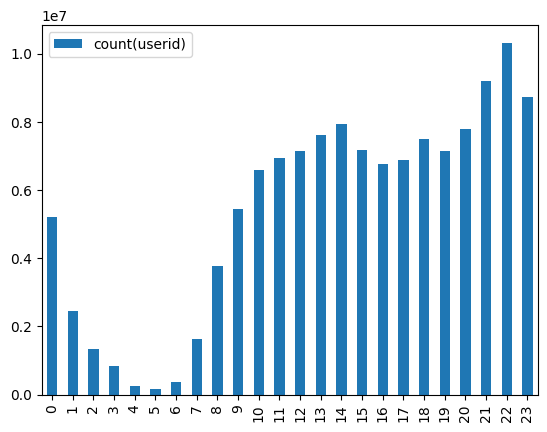

In [39]:
df.plot(kind='bar')

In [5]:
df = pd.read_sql_query("select count(userid) from touch group by strftime( '%H%M', timestamp) " , db.connection)

<AxesSubplot: >

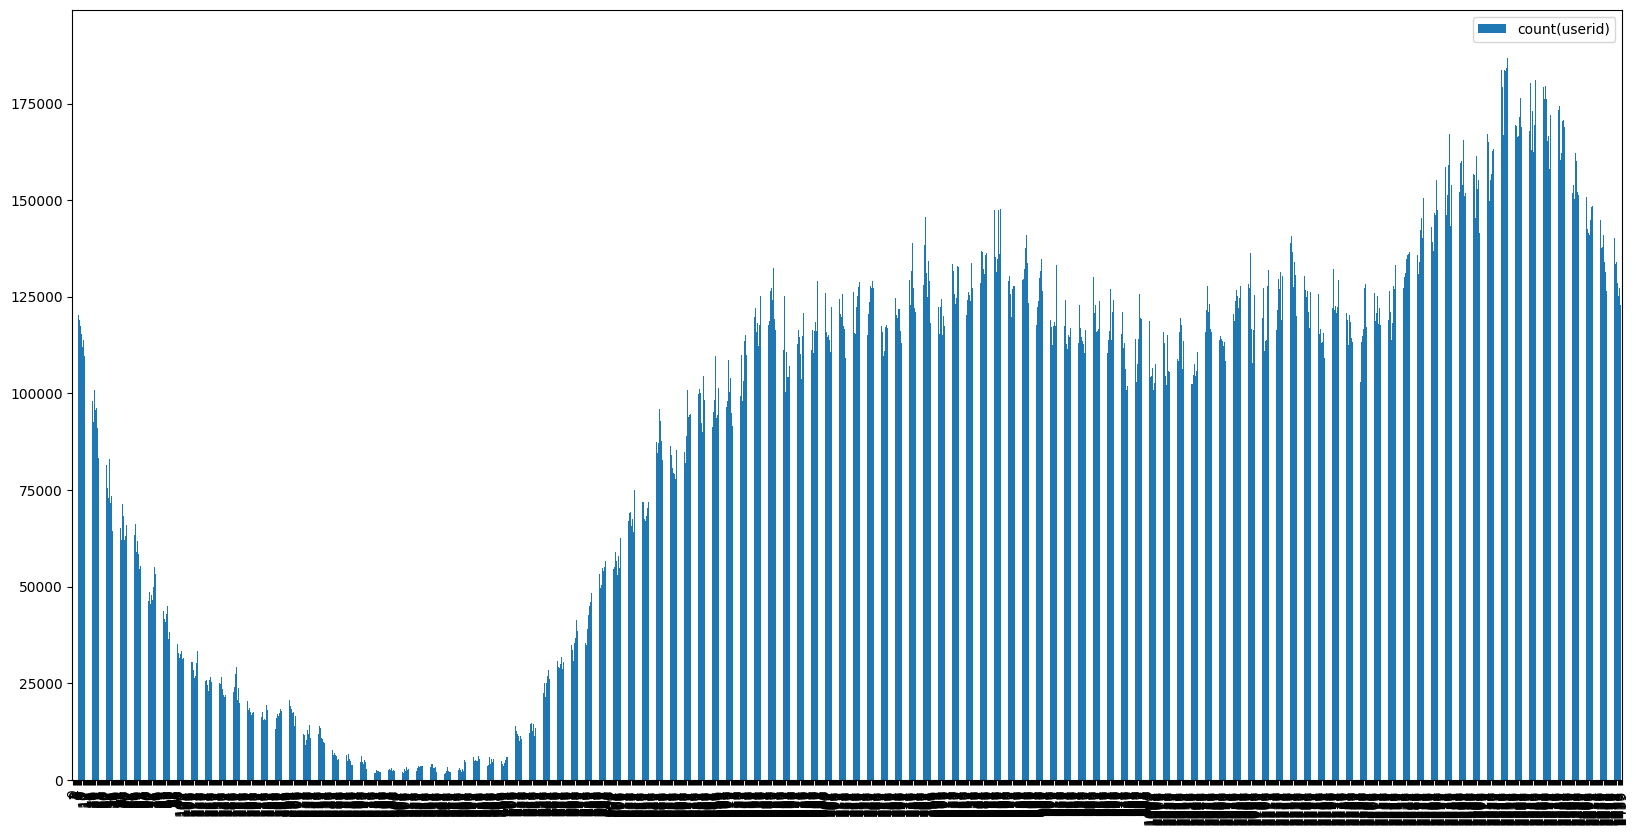

In [7]:
df.plot(kind='bar', figsize=(20,10))

## notification

In [9]:
df = pd.read_sql_query("select  count(nontificationid) from notification group  by userid  " , db.connection)

<AxesSubplot: >

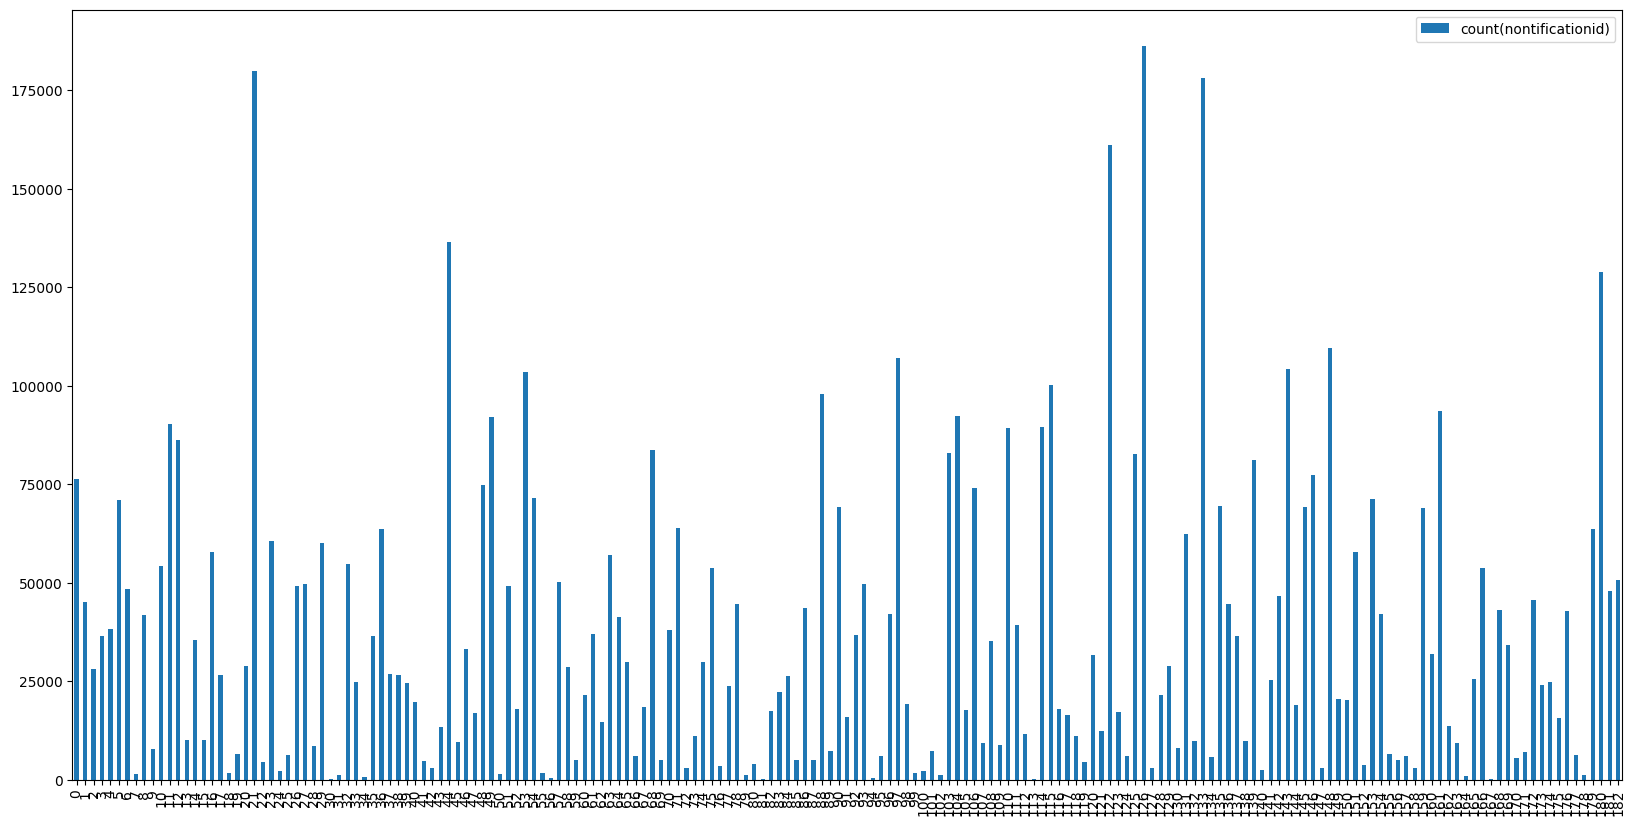

In [11]:
df.plot(kind='bar', figsize=(20,10))
#sort df values 



In [14]:
df = pd.read_sql_query("select  count(nontificationid) from notification group  by strftime( '%H', timestamp)  " , db.connection)

<AxesSubplot: >

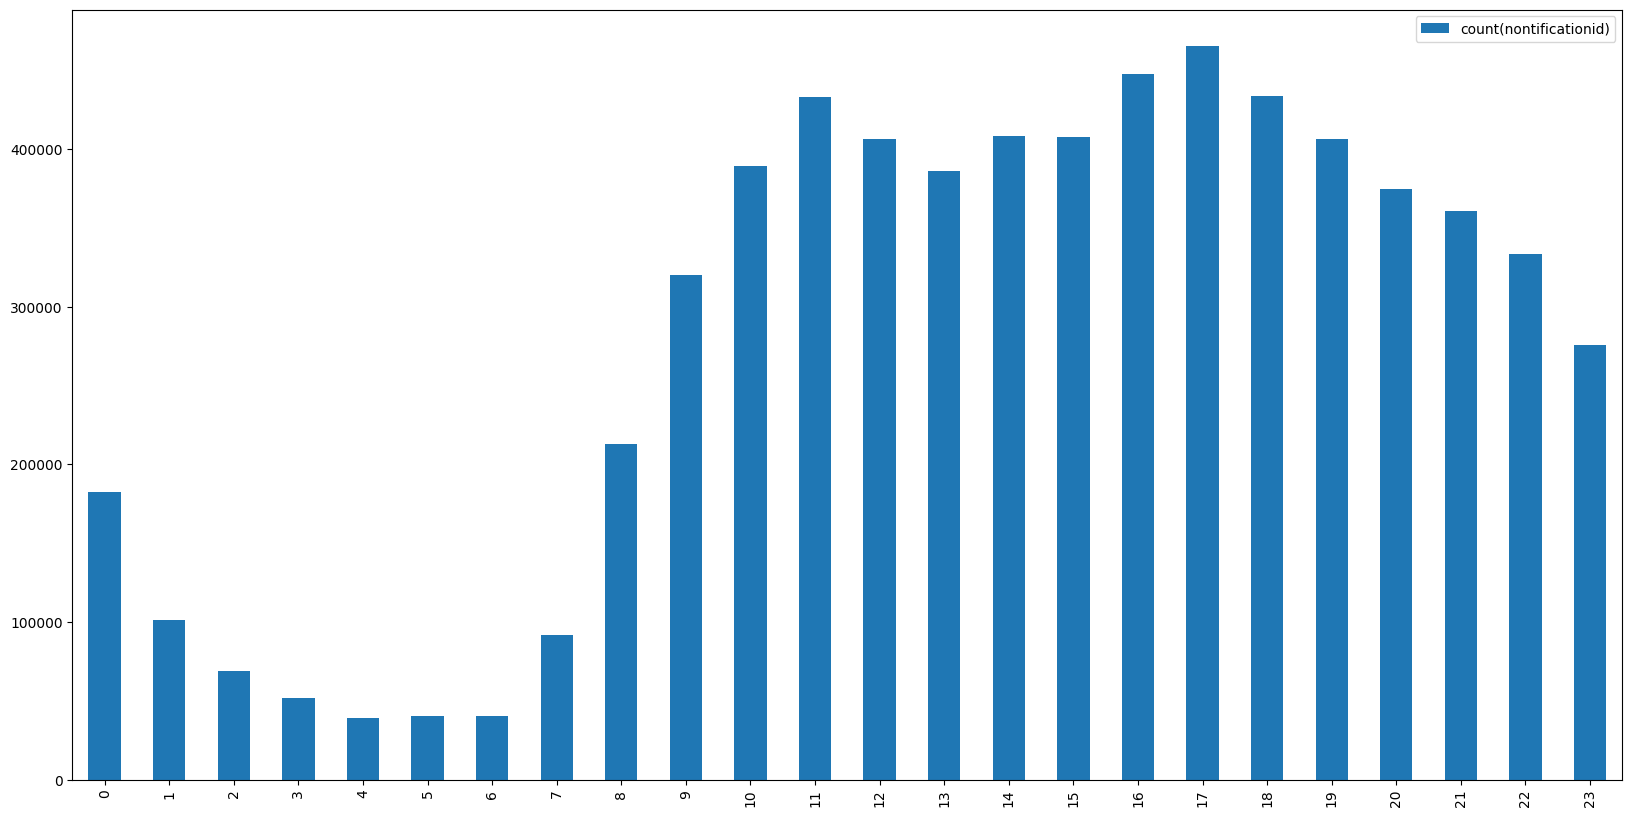

In [15]:
df.plot(kind='bar', figsize=(20,10))

In [16]:
df = pd.read_sql_query("select  count(nontificationid) from notification group  by strftime( '%M', timestamp)  " , db.connection)

<AxesSubplot: >

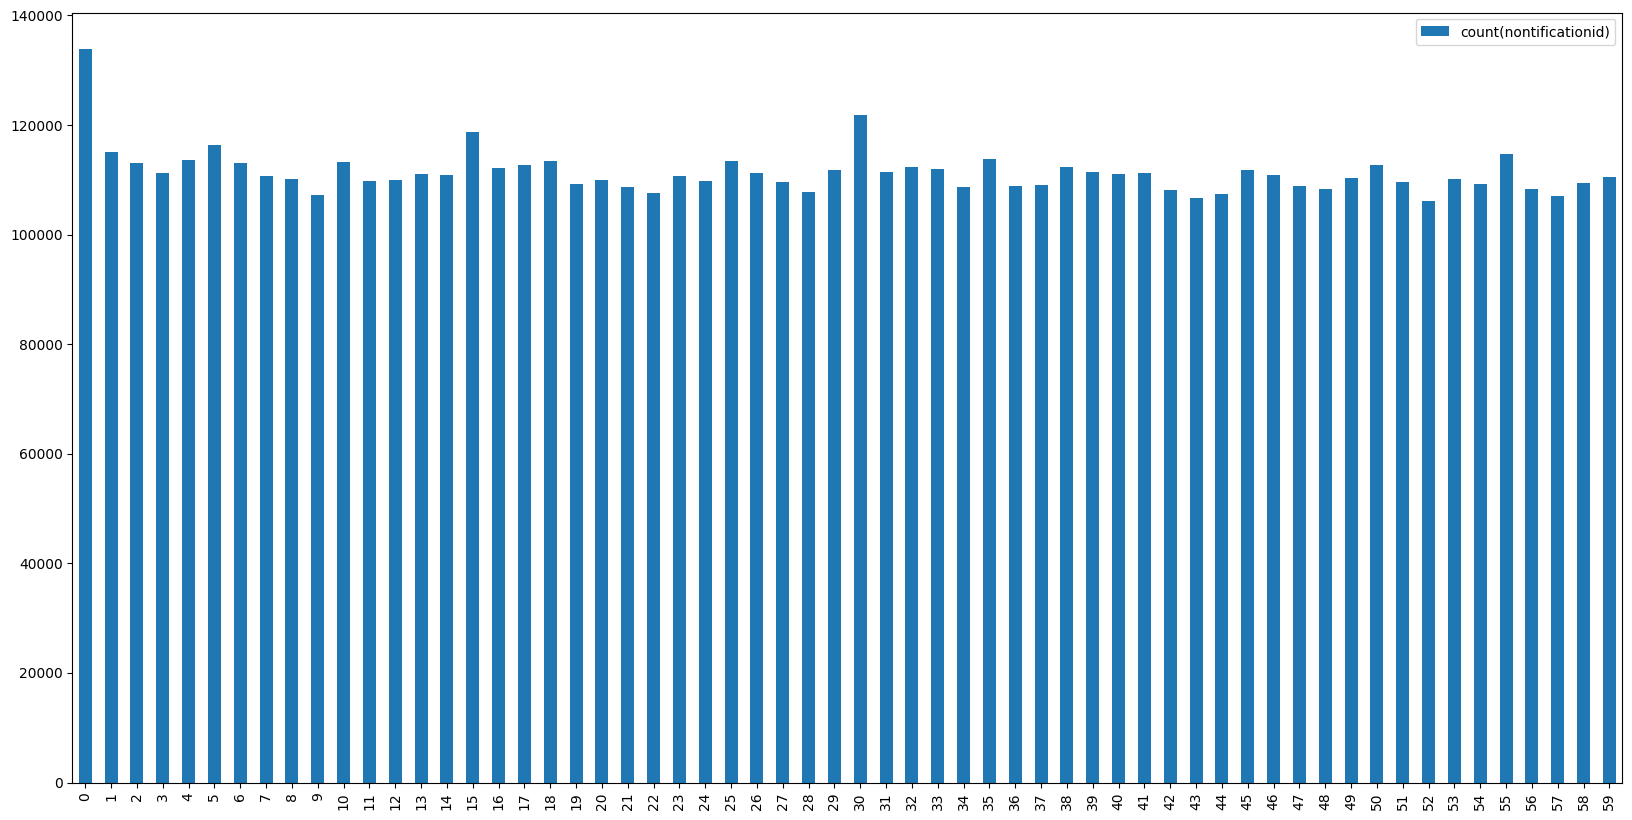

In [17]:
df.plot(kind='bar', figsize=(20,10))

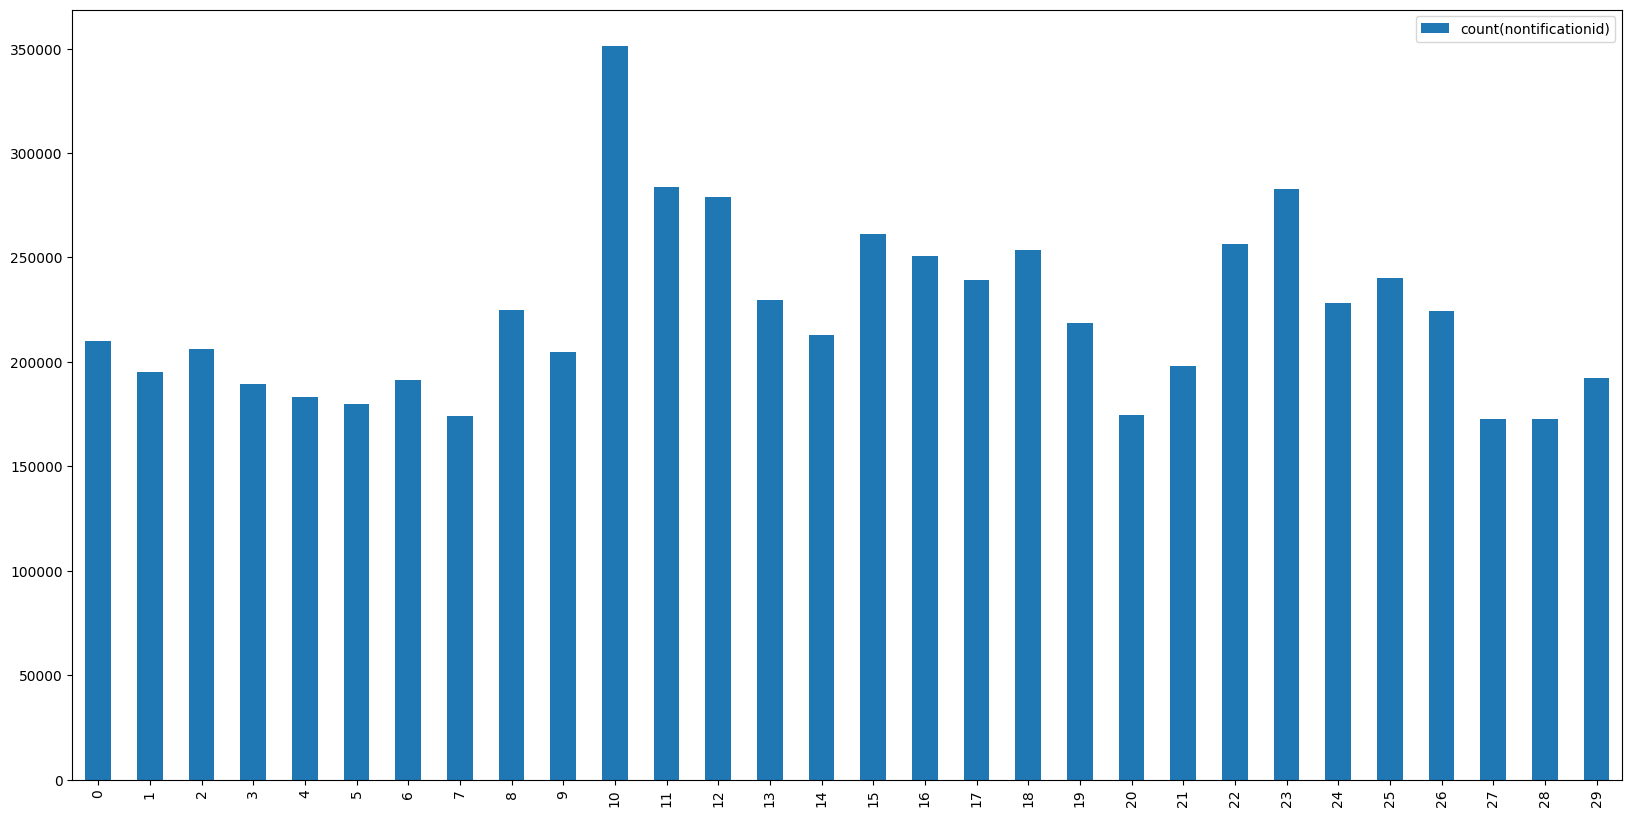

In [19]:
df = pd.read_sql_query("select  count(nontificationid) from notification group  by strftime( '%d', timestamp)  " , db.connection).plot(kind='bar', figsize=(20,10))

## application 

In [3]:
df = pd.read_sql_query("select userid, application, time from application where userid = 234 " , db.connection)

In [8]:
df.groupby('application').count().sort_values('userid', ascending=False).head(10)

,userid,time
application,,
,23190,23190
com.huawei.android.launcher,13816,13816
com.google.android.youtube,7799,7799
com.instagram.android,4911,4911
org.telegram.messenger,3015,3015
com.android.chrome,2090,2090
com.whatsapp,1916,1916
com.riotgames.legendsofruneterra,830,830
it.unitn.disi.witmee.sensorlog,715,715


In [74]:
df['hour'] = pd.to_datetime(df['time']).dt.hour
df['min'] = pd.to_datetime(df['time']).dt.minute
df['sec'] = pd.to_datetime(df['time']).dt.second



In [78]:
df1 = df.groupby(['hour','min']).count().sort_values(['hour','min'])
pd.set_option('display.max_rows', 500)

#groupby hour and compute the mean and std
df1.reset_index(inplace=True)
df1.groupby('min')['userid'].agg(['mean','std'])

#df[df['min'] == 1].groupby('hour')['userid'].count().plot(kind='bar')

df.query('min == 12 & hour == 22')
df.sort_values('time', ascending=False).head(100) 
df.query('application != "com.huawei.android.launcher" & application != "" & application != "it.unitn.disi.witmee.sensorlog"').sort_values(['time']).groupby(['hour', 'min'])['application'].apply(lambda x: x.value_counts().index[0]).reset_index().head(500)


#max rows to show
#df.groupby(['hour','min']).agg({'sec': ['mean', 'std']}).sort_values(['hour','min'])

,hour,min,application
0,0,1,com.google.android.youtube
1,0,2,com.google.android.youtube
2,0,3,com.google.android.youtube
3,0,4,com.google.android.youtube
4,0,5,com.google.android.youtube
5,0,6,com.google.android.youtube
6,0,7,com.google.android.youtube
7,0,8,com.google.android.youtube
8,0,9,com.google.android.youtube
9,0,10,com.google.android.youtube


In [36]:
df[df['application'] == 'com.google.android.youtube']

,userid,application,time,min,sec,hour
7787,234,com.google.android.youtube,14:21:59.757000,21,59,14
10176,234,com.google.android.youtube,20:34:08.612000,34,8,20
10177,234,com.google.android.youtube,20:34:03.576000,34,3,20
10178,234,com.google.android.youtube,20:33:58.571000,33,58,20
10179,234,com.google.android.youtube,20:33:53.613000,33,53,20
...,...,...,...,...,...,...
59680,234,com.google.android.youtube,12:01:27.429000,1,27,12
59681,234,com.google.android.youtube,12:01:22.412000,1,22,12
59682,234,com.google.android.youtube,12:01:17.477000,1,17,12
59683,234,com.google.android.youtube,12:01:12.310000,1,12,12


!! attenzione c'è un app senza nome che è quella piu usata 

In [35]:
df.value_counts('application')

application
                                       23190
com.huawei.android.launcher            13816
com.google.android.youtube              7799
com.instagram.android                   4911
org.telegram.messenger                  3015
com.android.chrome                      2090
com.whatsapp                            1916
com.riotgames.legendsofruneterra         830
it.unitn.disi.witmee.sensorlog           715
com.android.incallui                     666
com.duolingo                             296
com.google.android.apps.docs             216
com.adobe.scan.android                   131
com.google.android.gm                    117
com.example.android.notepad               86
com.roidapp.photogrid                     69
com.android.deskclock                     64
com.android.gallery3d                     49
com.habitrpg.android.habitica             49
com.android.settings                      28
com.android.contacts                      20
com.android.vending                       1

## Screen 

In [13]:
df = pd.read_sql_query("select count(status) from screen group by date" , db.connection)

In [14]:
df

,count(status)
0,78
1,38
2,1386
3,107014
4,157929
5,387084
6,477350
7,462168
8,643395
9,666508


In [10]:
df[df['date'] == '2020-11-23']

,timestamp,date,time,userid,status
2034,2020-11-23 23:43:17.249000,2020-11-23,23:43:17.249000,233,SCREEN_OFF
2035,2020-11-23 23:12:22.085000,2020-11-23,23:12:22.085000,233,SCREEN_OFF
2036,2020-11-23 23:10:39.131000,2020-11-23,23:10:39.131000,233,SCREEN_ON
2037,2020-11-23 22:48:17.784000,2020-11-23,22:48:17.784000,233,SCREEN_OFF
2038,2020-11-23 22:23:17.318000,2020-11-23,22:23:17.318000,233,SCREEN_OFF
...,...,...,...,...,...
2119,2020-11-23 04:05:56.842000,2020-11-23,04:05:56.842000,233,SCREEN_ON
2120,2020-11-23 01:14:43.103000,2020-11-23,01:14:43.103000,233,SCREEN_OFF
2121,2020-11-23 01:14:33.245000,2020-11-23,01:14:33.245000,233,SCREEN_ON
2122,2020-11-23 01:14:33.232000,2020-11-23,01:14:33.232000,233,SCREEN_OFF


## Location